___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!


Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*.
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---



# #Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying Clustering
- Create Cohort and Conduct Cohort Analysis

# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.describe() #there is negative values

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.shape

(541909, 8)

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

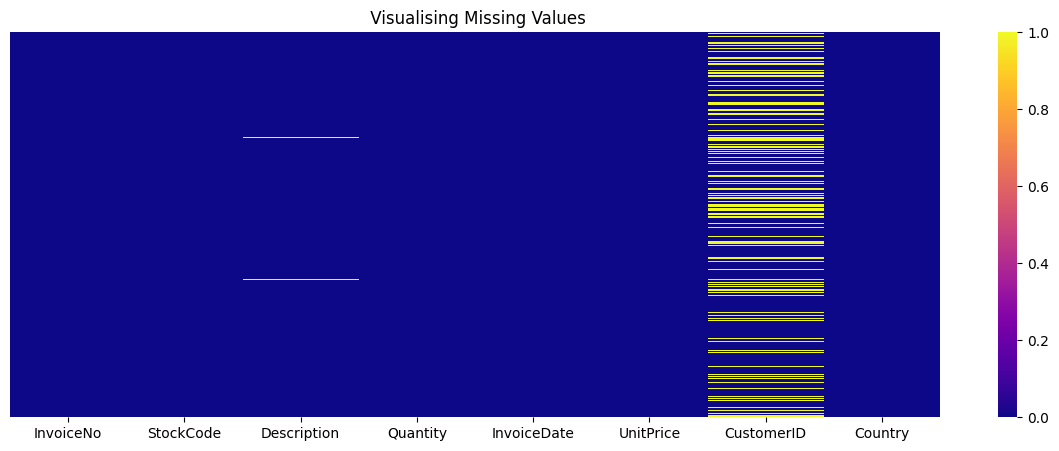

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values") # here we can see a missing values in customerID and Description

In [10]:
df.dropna(inplace=True) #we drop all missing values

In [11]:
df.shape

(406829, 8)

### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

In [12]:
df[df['Quantity'] <0].shape[0] #we are checking if there is negative values .. it might be a cancelled order

8905

In [13]:
df[df['UnitPrice'] < 0].shape[0] # after we drop missing values, the negative values drop it

0

In [14]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
# changing the datatype to str

In [15]:
df=df[~df['InvoiceNo'].str.contains('C')] # we drop canecllation orders

In [16]:
#almost 40 values are present so will drop this values
len(df[df['UnitPrice']==0])

40

In [17]:
# so, we are taking unitprice values greater than 0 only
df=df[df['UnitPrice']>0]

In [19]:
def explain(attribute):
    features= {'InvoiceNo': "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.",
    'StockCode': 'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.',
    'Description': 'Product (item) name. Nominal.',
    'Quantity': 'The quantities of each product (item) per transaction. Numeric.',
    'InvoiceDate': 'Invice Date and time. Numeric, the day and time when each transaction was generated.',
    'UnitPrice': 'Unit price. Numeric, Product price per unit in sterling.',
    'CustomerID': 'Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.',
    'Country': 'Country name. Nominal, the name of the country where each customer resides.'}
    return features[attribute]

In [20]:
explain('InvoiceNo')

"Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation."

When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

In [21]:
df[df['Quantity'] <0].shape[0] #we are checking again for the negative (cancelled) orders

0

In [22]:
df.describe() #as we see, we drop all negative values

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


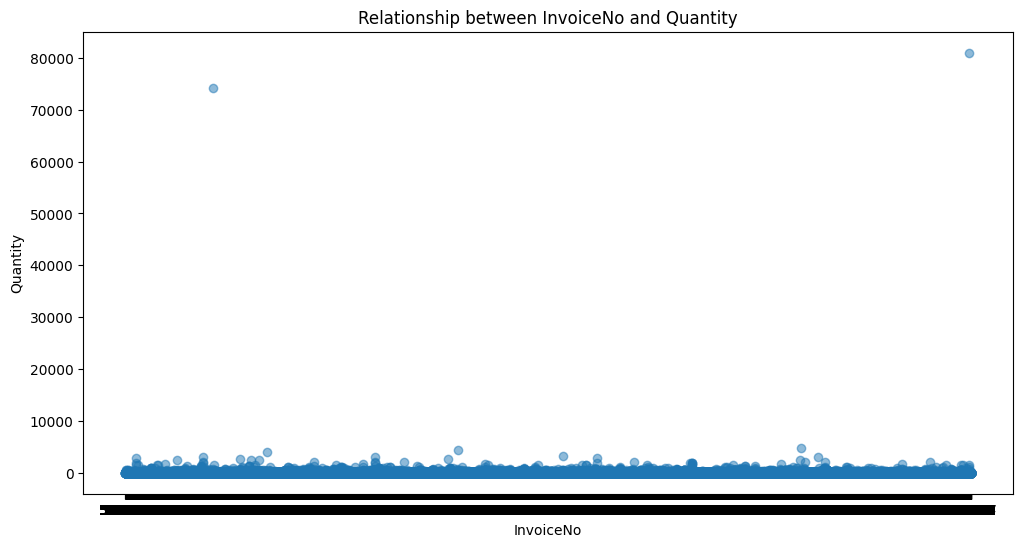

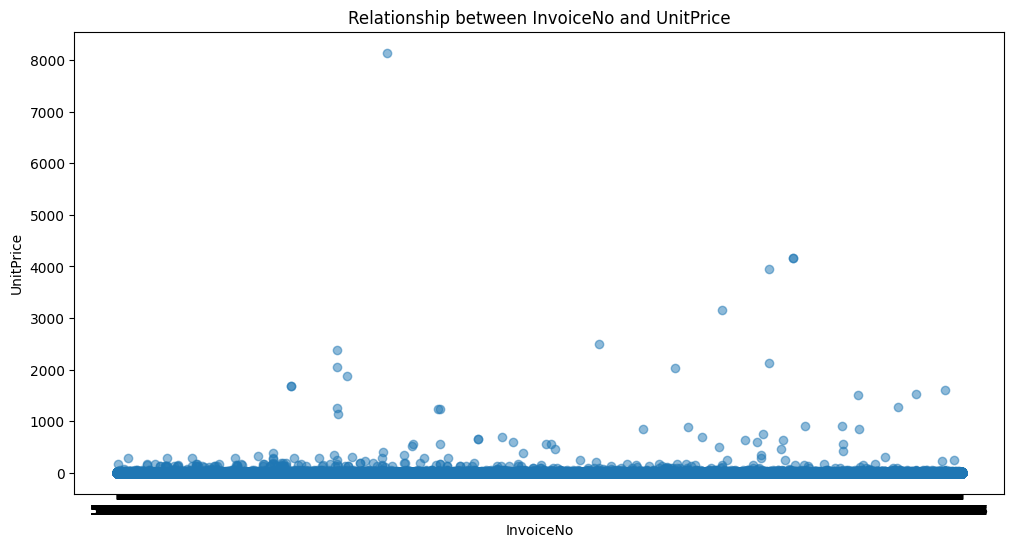

In [23]:
# Scatter plot to visualize relationships
plt.figure(figsize=(12, 6))
plt.scatter(df['InvoiceNo'], df['Quantity'], alpha=0.5)
plt.title('Relationship between InvoiceNo and Quantity')
plt.xlabel('InvoiceNo')
plt.ylabel('Quantity')
plt.show()
plt.figure(figsize=(12, 6))
plt.scatter(df['InvoiceNo'], df['UnitPrice'], alpha=0.5)
plt.title('Relationship between InvoiceNo and UnitPrice')
plt.xlabel('InvoiceNo')
plt.ylabel('UnitPrice')
plt.show()

### v. Explore the Orders


1. Find the unique number of InvoiceNo  per customer

In [24]:
# Group by CustomerID and count unique InvoiceNo
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
print(orders_per_customer)

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64


2. What's the average number of unqiue items per order or per customer?

In [25]:

avg_unique_items_per_order = df.groupby('InvoiceNo')['StockCode'].nunique().mean() # Calculate the average number of unique items per order

avg_unique_items_per_customer = df.groupby('CustomerID')['StockCode'].nunique().mean()# Calculate the average number of unique items per customer

print("Average unique items per order:", avg_unique_items_per_order)
print("Average unique items per customer:", avg_unique_items_per_customer)

Average unique items per order: 20.92817828620764
Average unique items per customer: 61.50115260488705


3. Let's see how this compares to the number of unique products per customer.

In [26]:

unique_items_per_customer = df.groupby('CustomerID')['StockCode'].nunique()# Calculate the number of unique products per customer

print("Number of unique items per customer:")
print(unique_items_per_customer)

Number of unique items per customer:
CustomerID
12346.0      1
12347.0    103
12348.0     22
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    263
18287.0     59
Name: StockCode, Length: 4338, dtype: int64


### vi. Explore Customers by Country

1. What's the total revenue per country?

In [27]:
df['TotalPrice'] = df['UnitPrice']*df['Quantity']

In [28]:
df2=pd.DataFrame(df.groupby('Country').TotalPrice.sum().apply(lambda x: round(x,2))).sort_values('TotalPrice',ascending=False)

df2['perc_of_TotalPrice']=round(df2.TotalPrice/df2.TotalPrice.sum()*100,2)
df2

,TotalPrice,perc_of_TotalPrice
Country,,
United Kingdom,7308391.55,82.01
Netherlands,285446.34,3.20
EIRE,265545.90,2.98
Germany,228867.14,2.57
France,209024.05,2.35
Australia,138521.31,1.55
Spain,61577.11,0.69
Switzerland,56443.95,0.63
Belgium,41196.34,0.46


2. Visualize number of customer per country

In [29]:
df2['customer_num']=df.groupby('Country').CustomerID.nunique()
df2['customer_rate']=round(df2.customer_num/df2.customer_num.sum()*100,2)
df2.head(5)

,TotalPrice,perc_of_TotalPrice,customer_num,customer_rate
Country,,,,
United Kingdom,7308391.55,82.01,3920,90.20
Netherlands,285446.34,3.20,9,0.21
EIRE,265545.90,2.98,3,0.07
Germany,228867.14,2.57,94,2.16
France,209024.05,2.35,87,2.00


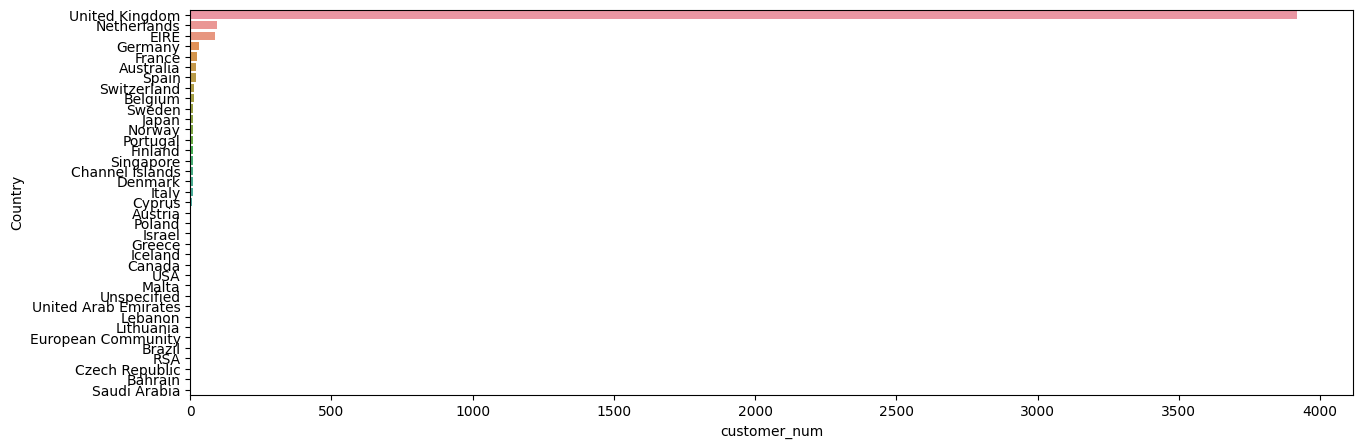

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(y=df2.index, x=df2.customer_num.sort_values(ascending=False));

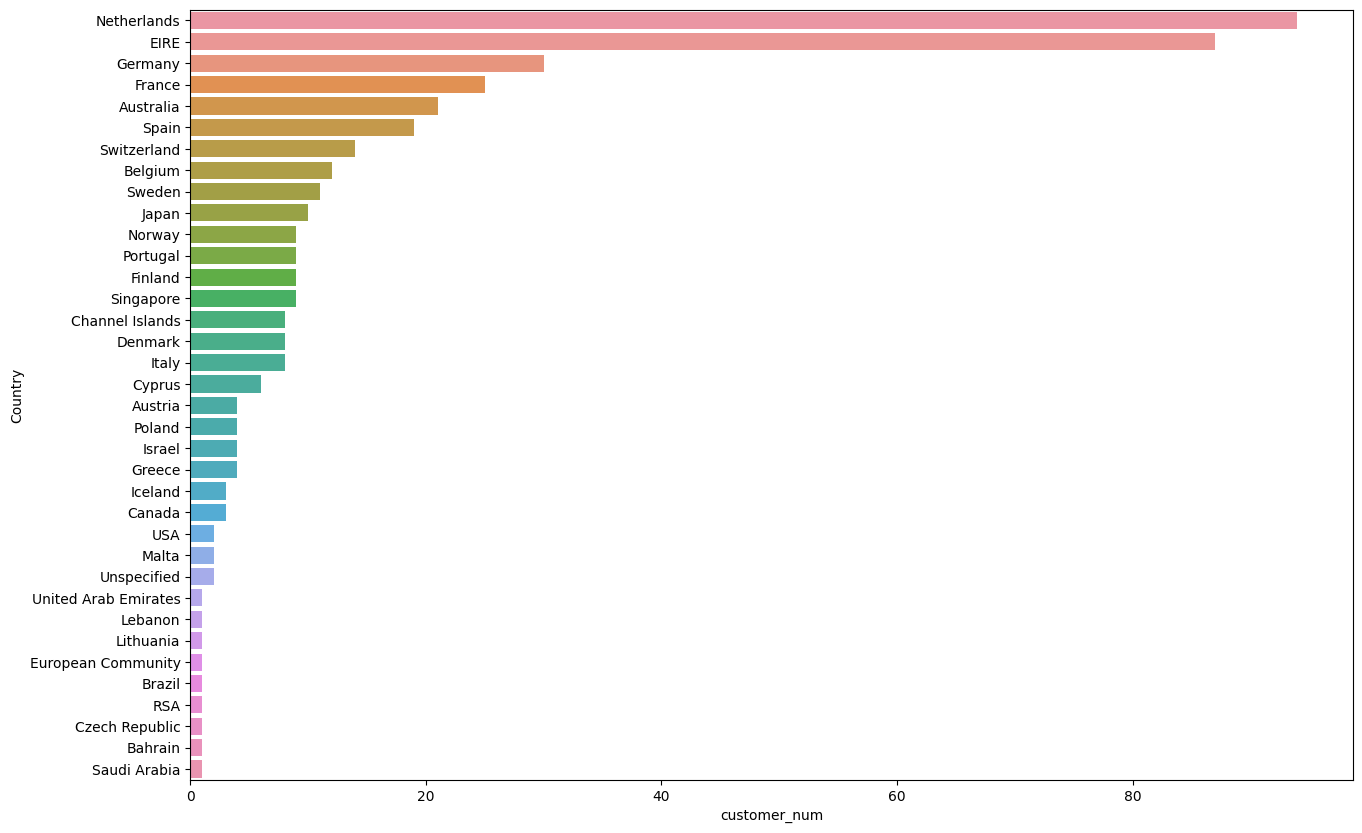

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(y=df2.iloc[1:].index, x=df2.iloc[1:].customer_num.sort_values(ascending=False));

3. Visualize total cost per country

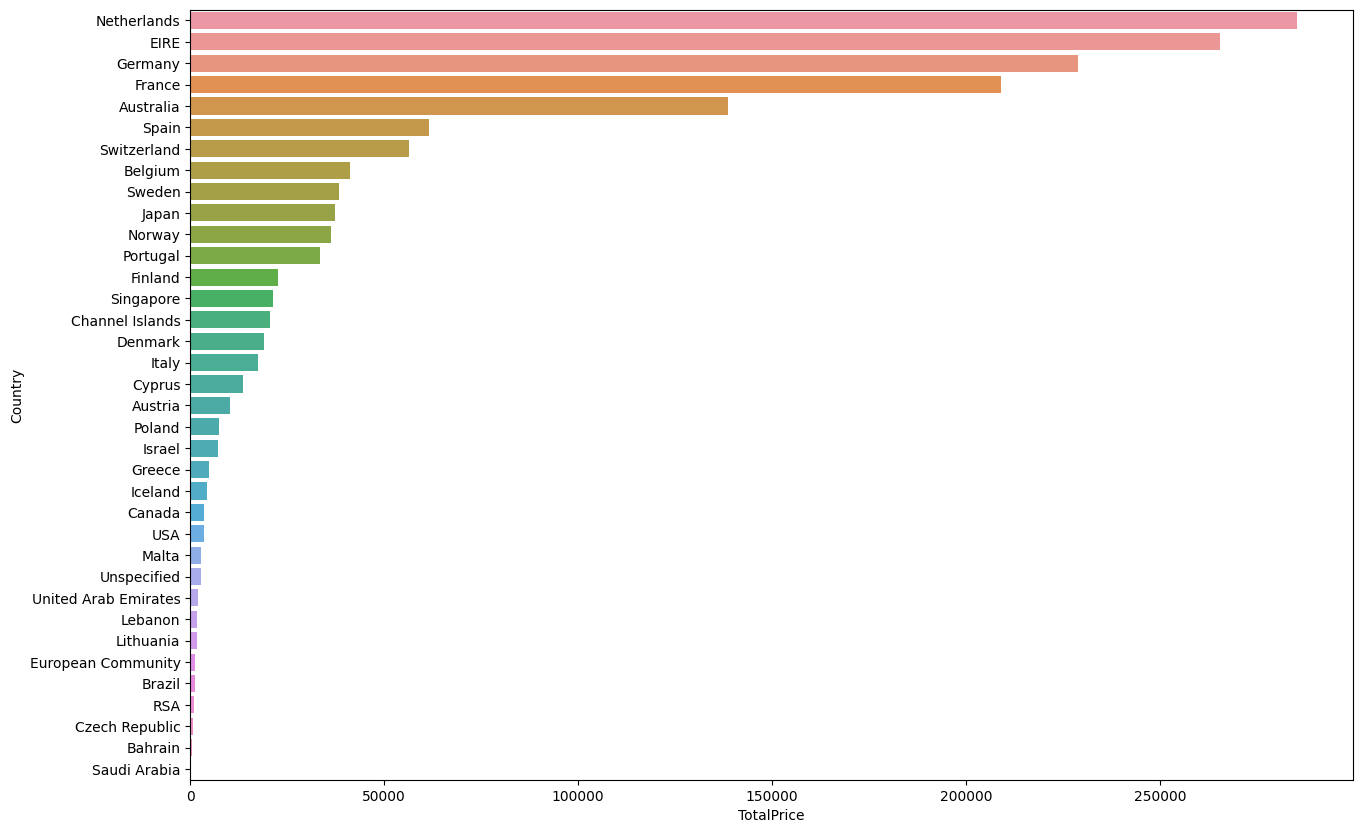

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(y=df2.iloc[1:].index, x=df2.iloc[1:].TotalPrice.sort_values(ascending=False));

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [33]:
df_uk=df[df.Country=='United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


2. What are the most popular products that are bought in the UK?

In [34]:
pd.DataFrame(df_uk.StockCode.value_counts().head(10)) #most popular products in the UK

,StockCode
85123A,1947
85099B,1464
22423,1426
84879,1333
47566,1307
20725,1147
20727,1049
22720,1020
23203,999
22383,996


### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with using **Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?


### i. Import Libraries

In [35]:
import pandas as pd
import numpy as np
import datetime as dt #we will need this library to calculate the recency
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

### ii. Review df_uk DataFrame

In [36]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### iii. Recency: Days since last purchase
To calculate the recency values, follow these steps in order:

1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
2. Create a new column called Date which contains the invoice date without the timestamp
3. Group by CustomerID and check the last date of purchase
4. Calculate the days since last purchase
5. Drop Last_Purchase_Date since we don't need it anymore
6. Plot RFM distributions

1. Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [37]:
ref_date = max(df['InvoiceDate']) #calculating the most recent date to calculate the recency in the RFM
ref_date

Timestamp('2011-12-09 12:50:00')

2. Create a new column called Date which contains the invoice date without the timestamp

In [38]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate']) #we only want to represent the date
df_uk['Date'] = df_uk['InvoiceDate'].dt.date
df_uk.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01


3. Group by CustomerID and check the last date of purchase

In [39]:
df_uk['Last_Purchase_Date']=df_uk.groupby(['CustomerID'])['Date'].transform(max)
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Last_Purchase_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-02
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-02
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02


4. Calculate the days since last purchase

In [40]:
import pandas as pd

ref_date = pd.to_datetime('2011-12-08')

df_uk['Last_Purchase_Date'] = pd.to_datetime(df_uk['Last_Purchase_Date'])


df_uk['Recency'] = df_uk.groupby('CustomerID')['Last_Purchase_Date'].transform(lambda x: (ref_date - x.max()).days) # Create a new column 'Recency' in df_uk

df_uk.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Last_Purchase_Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-02,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-02,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02,371
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12-01,2010-12-02,371
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12-01,2010-12-02,371
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-02,371
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-02,371
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,2011-11-08,30


5. Drop Last_Purchase_Date since we don't need it anymore

In [41]:
df_uk = df_uk.drop('Last_Purchase_Date',axis=1)

### iv. Frequency: Number of purchases

To calculate how many times a customer purchased something, we need to count how many invoices each customer has. To calculate the frequency values, follow these steps in order:

1. Make a copy of df_uk and drop duplicates

In [42]:
df_uk=df_uk.drop_duplicates()

2. Calculate the frequency of purchases

In [43]:
df_uk['Frequency'] = df_uk.groupby('CustomerID').InvoiceNo.transform('nunique')

1. Calculate sum total cost by customers and named "Monetary"

In [44]:
df_uk['Monetary'] = df_uk.groupby('CustomerID').TotalPrice.transform('sum')

### vi. Create RFM Table


In [45]:

df_rfm = df_uk.groupby('CustomerID').agg({
    'Recency': 'min',
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}).reset_index() # Create the RFM dataframe

print(df_rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      324          1  77183.60
1     12747.0        1         11   4196.01
2     12748.0       -1        209  33053.19
3     12749.0        2          5   4090.88
4     12820.0        2          4    942.34


# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.
<br>
<br>
**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

In [46]:
duplicate_frequency = df_rfm[df_rfm.duplicated(subset=['Frequency'], keep=False)] # Check for duplicate values in the Frequency column

In [47]:
print(duplicate_frequency) # Display the rows with duplicate Frequency values

      CustomerID  Recency  Frequency  Monetary
0        12346.0      324          1  77183.60
1        12747.0        1         11   4196.01
3        12749.0        2          5   4090.88
4        12820.0        2          4    942.34
5        12821.0      213          1     92.72
...          ...      ...        ...       ...
3915     18280.0      276          1    180.60
3916     18281.0      179          1     80.82
3917     18282.0        6          2    178.05
3918     18283.0        2         16   2045.53
3919     18287.0       41          3   1837.28

[3900 rows x 4 columns]


In [48]:
print(df_rfm.columns) # Print the columns before attempting to drop 'Frequency'

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')


In [49]:
df_rfm = df_rfm.drop('Frequency', axis=1) # Drop the existing 'Frequency' column

df_rfm = df_rfm.groupby('CustomerID').agg({'Recency': 'mean', 'Monetary': 'sum'}).reset_index() # Aggregate by taking the mean


In [50]:

frequency_df = df_uk.groupby('CustomerID')['InvoiceNo'].nunique().reset_index() # Calculate 'Frequency' separately
frequency_df.columns = ['CustomerID', 'Frequency']

In [51]:

df_rfm = pd.merge(df_rfm, frequency_df, on='CustomerID') # Merge 'Frequency' back to df_rfm

In [52]:
# Proceed with creating quartiles for Frequency
df_rfm['Frequency_Quartile'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), q=[0, 0.25, 0.5, 0.75, 1], labels=False)
df_rfm['Recency_Quartile'] = pd.qcut(df_rfm['Recency'].rank(method='first'), q=[0, 0.25, 0.5, 0.75, 1], labels=False)


df_rfm.head()  # Display the updated df_rfm

,CustomerID,Recency,Monetary,Frequency,Frequency_Quartile,Recency_Quartile
0,12346.0,324.0,77183.60,1,0,3
1,12747.0,1.0,4196.01,11,3,0
2,12748.0,-1.0,33053.19,209,3,0
3,12749.0,2.0,4090.88,5,2,0
4,12820.0,2.0,942.34,4,2,0


### i. Creating the RFM Segmentation Table


We are Creating two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

In [54]:
def assign_recency_score(x):   #x is the quartile
    if x <= 1:
        return 4
    elif x <= 2:
        return 3
    elif x <= 3:
        return 2
    else:
        return 1

def assign_frequency_monetary_score(x): #freq and monetary scores
    if x == 4:
        return 1
    elif x == 3:
        return 2
    elif x == 2:
        return 3
    else:
        return 4


In [55]:

print(df_rfm.columns) # Check the columns in df_rfm


if 'Monetary_Quartile' not in df_rfm.columns:
    df_rfm['Monetary_Quartile'] = pd.qcut(df_rfm['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=False) # If 'Monetary_Quartile' is not present, create it

Index(['CustomerID', 'Recency', 'Monetary', 'Frequency', 'Frequency_Quartile',
       'Recency_Quartile'],
      dtype='object')


In [56]:
# Apply the scoring functions
df_rfm['Recency_Score'] = df_rfm['Recency_Quartile'].apply(assign_recency_score)
df_rfm['Frequency_Score'] = df_rfm['Frequency_Quartile'].apply(assign_frequency_monetary_score)
df_rfm['Monetary_Score'] = df_rfm['Monetary_Quartile'].apply(assign_frequency_monetary_score)


df_rfm.head() # Display the updated df_rfm

,CustomerID,Recency,Monetary,Frequency,Frequency_Quartile,Recency_Quartile,Monetary_Quartile,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,324.0,77183.60,1,0,3,3,2,4,2
1,12747.0,1.0,4196.01,11,3,0,3,4,2,2
2,12748.0,-1.0,33053.19,209,3,0,3,4,2,2
3,12749.0,2.0,4090.88,5,2,0,3,4,3,2
4,12820.0,2.0,942.34,4,2,0,2,4,3,3


In [57]:
# Combine the scores for segmentation
df_rfm['Segment'] = df_rfm['Recency_Score'].astype(str) + df_rfm['Frequency_Score'].astype(str) + df_rfm['Monetary_Score'].astype(str)

df_rfm.head()# Display the updated df_rfm with the new 'Segment' column

,CustomerID,Recency,Monetary,Frequency,Frequency_Quartile,Recency_Quartile,Monetary_Quartile,Recency_Score,Frequency_Score,Monetary_Score,Segment
0,12346.0,324.0,77183.60,1,0,3,3,2,4,2,242
1,12747.0,1.0,4196.01,11,3,0,3,4,2,2,422
2,12748.0,-1.0,33053.19,209,3,0,3,4,2,2,422
3,12749.0,2.0,4090.88,5,2,0,3,4,3,2,432
4,12820.0,2.0,942.34,4,2,0,2,4,3,3,433


In [58]:
#Defining rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level
label = []

for i in range(len(df_rfm)):
    first_char = df_rfm['Segment'].iloc[i][0]
    second_char = df_rfm['Segment'].iloc[i][1] if len(df_rfm['Segment'].iloc[i]) > 1 else None

    if first_char == '4':
        if second_char == '4':
            label.append("1-Best Customers")
        elif second_char == '2':
            label.append("2-Loyal Customers")
        else:
            label.append("2-Loyal Customers")
    elif first_char == '3':
        label.append("3-Big Spenders")
    elif first_char == '2':
        label.append("4-Almost Lost")
    elif first_char == '1':
        label.append("5-Lost Customers")
    elif first_char == '0':
        label.append("6-Lost Cheap Customers")

# Ensure the label list has the same length as the DataFrame
if len(label) == len(df_rfm):
    df_rfm['RFM_Scores_Segments'] = label
else:
    print("Error: Length mismatch between label list and DataFrame.")


In [59]:

df_rfm['RFM_Scores_Segments'] = label
df_rfm

,CustomerID,Recency,Monetary,Frequency,Frequency_Quartile,Recency_Quartile,Monetary_Quartile,Recency_Score,Frequency_Score,Monetary_Score,Segment,RFM_Scores_Segments
0,12346.0,324.0,77183.60,1,0,3,3,2,4,2,242,4-Almost Lost
1,12747.0,1.0,4196.01,11,3,0,3,4,2,2,422,2-Loyal Customers
2,12748.0,-1.0,33053.19,209,3,0,3,4,2,2,422,2-Loyal Customers
3,12749.0,2.0,4090.88,5,2,0,3,4,3,2,432,2-Loyal Customers
4,12820.0,2.0,942.34,4,2,0,2,4,3,3,433,2-Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,276.0,180.60,1,1,3,0,2,4,4,244,4-Almost Lost
3916,18281.0,179.0,80.82,1,1,3,0,2,4,4,244,4-Almost Lost
3917,18282.0,6.0,178.05,2,2,0,0,4,3,4,434,2-Loyal Customers
3918,18283.0,2.0,2045.53,16,3,0,3,4,2,2,422,2-Loyal Customers


In [60]:
Best_Customers= ['444','443','442'] # we defined the range for each customer category
Loyal_Customers=['434','433','432','431','430','424','423','422','421','420','414','413','412','411','410']
Big_Spenders=['344','343','342','341','340','334','333','332','331','330','324','323','322','321','320','314','313','312','311','310','304','303','302','301','300']
Almost_Lost=['244','243','242','241','240','234','233','232','231','230','224','223','222','221','220','214','213','212','211','210','204','203','202','201','200']
Lost_Customers=['222','311','322','223','332','411','133','132','312','131','123','213','113','421','412','231','321','232']
Lost_Cheap_Customers=['122','211','112','121','212','221']

In [61]:
for i in range(len(df_rfm)):
   if df_rfm['Segment'].iloc[i] in Best_Customers : label[i] = "1-Best Customers"
   elif df_rfm['Segment'].iloc[i] in Loyal_Customers : label[i] = "2-Loyal Customers"
   elif df_rfm['Segment'].iloc[i] in Big_Spenders : label[i] = "3-Big Spenders"
   elif df_rfm['Segment'].iloc[i] in Almost_Lost : label[i] = "4-Almost Lost"
   elif df_rfm['Segment'].iloc[i] in Lost_Customers : label[i] = "5-Lost Customers"
   elif df_rfm['Segment'].iloc[i] in Lost_Cheap_Customers  : label[i] = "6-Lost Cheap Customers"

df_rfm['RFM_Scores_Segments'] = label
df_rfm

,CustomerID,Recency,Monetary,Frequency,Frequency_Quartile,Recency_Quartile,Monetary_Quartile,Recency_Score,Frequency_Score,Monetary_Score,Segment,RFM_Scores_Segments
0,12346.0,324.0,77183.60,1,0,3,3,2,4,2,242,4-Almost Lost
1,12747.0,1.0,4196.01,11,3,0,3,4,2,2,422,2-Loyal Customers
2,12748.0,-1.0,33053.19,209,3,0,3,4,2,2,422,2-Loyal Customers
3,12749.0,2.0,4090.88,5,2,0,3,4,3,2,432,2-Loyal Customers
4,12820.0,2.0,942.34,4,2,0,2,4,3,3,433,2-Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,276.0,180.60,1,1,3,0,2,4,4,244,4-Almost Lost
3916,18281.0,179.0,80.82,1,1,3,0,2,4,4,244,4-Almost Lost
3917,18282.0,6.0,178.05,2,2,0,0,4,3,4,434,2-Loyal Customers
3918,18283.0,2.0,2045.53,16,3,0,3,4,2,2,422,2-Loyal Customers


In [62]:
# Calculate average values for each RFM_Level
rfm_level_avg = df_rfm.groupby('RFM_Scores_Segments').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'size'
}).reset_index()

# Rename the 'CustomerID' column to 'Segment Size'
rfm_level_avg = rfm_level_avg.rename(columns={'CustomerID': 'Segment Size'})

# Display the average values for each RFM_Level and the size of each segment
rfm_level_avg


,RFM_Scores_Segments,Recency,Frequency,Monetary,Segment Size
0,1-Best Customers,23.399329,1.456376,738.170671,596
1,2-Loyal Customers,15.997067,8.472141,3878.735389,1364
2,3-Big Spenders,82.145918,2.668367,960.802624,980
3,4-Almost Lost,244.326531,1.639796,625.401307,980


## Plot RFM Segments

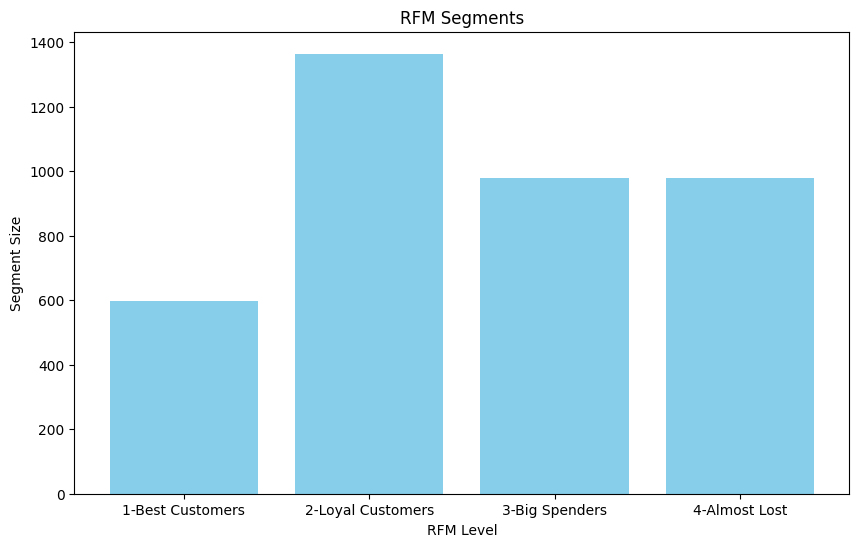

In [63]:
import matplotlib.pyplot as plt

# Plot RFM Segments
plt.figure(figsize=(10, 6))
plt.bar(rfm_level_avg['RFM_Scores_Segments'], rfm_level_avg['Segment Size'], color='skyblue')
plt.title('RFM Segments')
plt.xlabel('RFM Level')
plt.ylabel('Segment Size')
plt.show()

Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales). We can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

2. How many customers do we have in each segment?

In [64]:
rfm_segment_counts = df_rfm['RFM_Scores_Segments'].value_counts()
print(rfm_segment_counts)

2-Loyal Customers    1364
4-Almost Lost         980
3-Big Spenders        980
1-Best Customers      596
Name: RFM_Scores_Segments, dtype: int64


# 3. Applying K-Means Clustering

Now that we have our customers segmented into different categories, we can gain further insight into customer behavior by using unsupervised models in conjuction with out RFM model.
Unsupervised Learning has also been widely used for market segmentation and has the advantage of being simple to implement. Possible algorithms include **K-means Clustering**, **Aglomerative Clustering**, and **Gaussian Mixtute**.

## Data Pre-Processing and Exploring

In [65]:
#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### i. Define and Plot Feature Correlations

<Axes: >

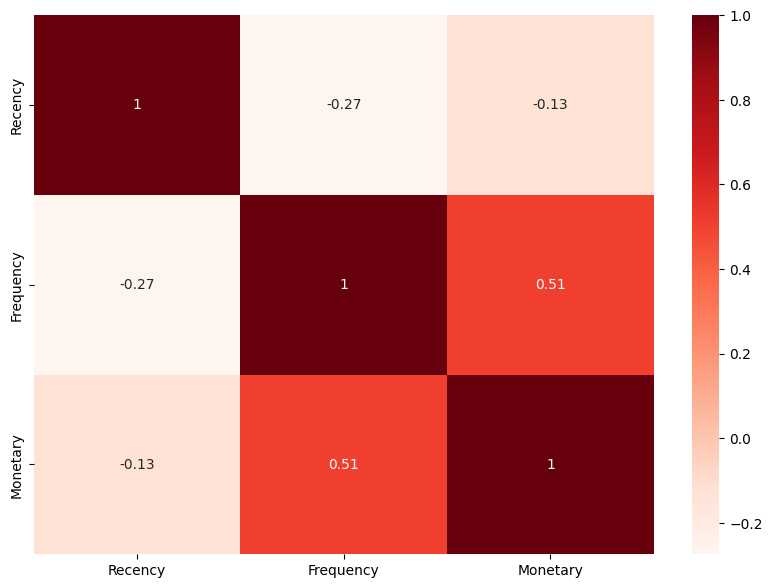

In [66]:
plt.figure(figsize=(10,7))
sns.heatmap(df_rfm[['Recency','Frequency', 'Monetary']].corr(),cmap="Reds", annot= True) #There is a negative correlation between Recency - Frequency and Recency - Monetary, but there is a strong positive correlation between Frequency - Monetary

### ii. Visualize Feature Distributions



<Figure size 1500x1500 with 0 Axes>

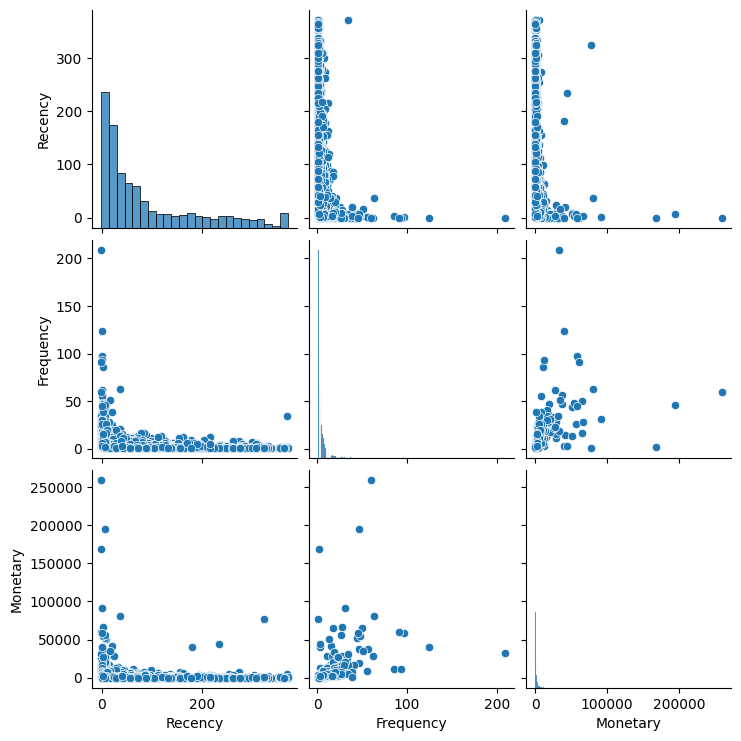

In [67]:
plt.figure(figsize=(15,15))
sns.pairplot(df_rfm[['Recency', 'Frequency', 'Monetary']]);

### iii. Data Normalization

                ----------------- Log Transformation Plots for R,F,M -------------------------------


<Axes: xlabel='log_M', ylabel='Density'>

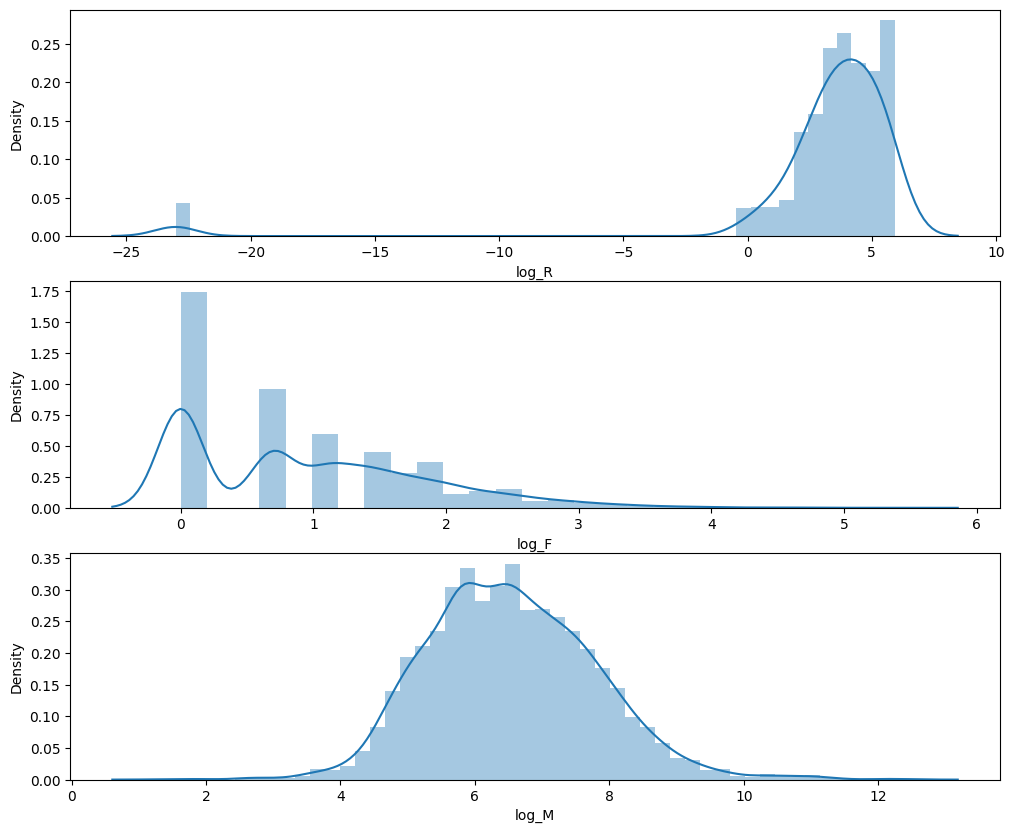

In [68]:
# Adding a small constant to avoid zero or negative values
epsilon = 1e-10

# Taking Log of columns with added constant
df_rfm["log_R"] = np.log(df_rfm.Recency + epsilon)
df_rfm["log_F"] = np.log(df_rfm.Frequency + epsilon)
df_rfm["log_M"] = np.log(df_rfm.Monetary + epsilon)

# Checking the distribution of Recency, Frequency, and Monetary variables after log transformation
print("                ----------------- Log Transformation Plots for R,F,M -------------------------------")
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
sns.distplot(df_rfm['log_R'])
plt.subplot(3, 1, 2)
sns.distplot(df_rfm['log_F'])
plt.subplot(3, 1, 3)
sns.distplot(df_rfm['log_M'])


In [69]:
import math

epsilon = 1e-10  # Small constant to avoid zero or negative values

df_rfm['log_R'] = df_rfm['Recency'].apply(lambda x: math.log(x + epsilon) if x > 0 else 0)
df_rfm['log_F'] = df_rfm['Frequency'].apply(lambda x: math.log(x + epsilon) if x > 0 else 0)
df_rfm['log_M'] = df_rfm['Monetary'].apply(lambda x: math.log(x + epsilon) if x > 0 else 0)


In [70]:
df_rfm

,CustomerID,Recency,Monetary,Frequency,Frequency_Quartile,Recency_Quartile,Monetary_Quartile,Recency_Score,Frequency_Score,Monetary_Score,Segment,RFM_Scores_Segments,log_R,log_F,log_M
0,12346.0,324.0,77183.60,1,0,3,3,2,4,2,242,4-Almost Lost,5.780744e+00,1.000000e-10,11.253942
1,12747.0,1.0,4196.01,11,3,0,3,4,2,2,422,2-Loyal Customers,1.000000e-10,2.397895e+00,8.341889
2,12748.0,-1.0,33053.19,209,3,0,3,4,2,2,422,2-Loyal Customers,0.000000e+00,5.342334e+00,10.405873
3,12749.0,2.0,4090.88,5,2,0,3,4,3,2,432,2-Loyal Customers,6.931472e-01,1.609438e+00,8.316515
4,12820.0,2.0,942.34,4,2,0,2,4,3,3,433,2-Loyal Customers,6.931472e-01,1.386294e+00,6.848366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,276.0,180.60,1,1,3,0,2,4,4,244,4-Almost Lost,5.620401e+00,1.000000e-10,5.196285
3916,18281.0,179.0,80.82,1,1,3,0,2,4,4,244,4-Almost Lost,5.187386e+00,1.000000e-10,4.392224
3917,18282.0,6.0,178.05,2,2,0,0,4,3,4,434,2-Loyal Customers,1.791759e+00,6.931472e-01,5.182064
3918,18283.0,2.0,2045.53,16,3,0,3,4,2,2,422,2-Loyal Customers,6.931472e-01,2.772589e+00,7.623412


<Figure size 1500x1500 with 0 Axes>

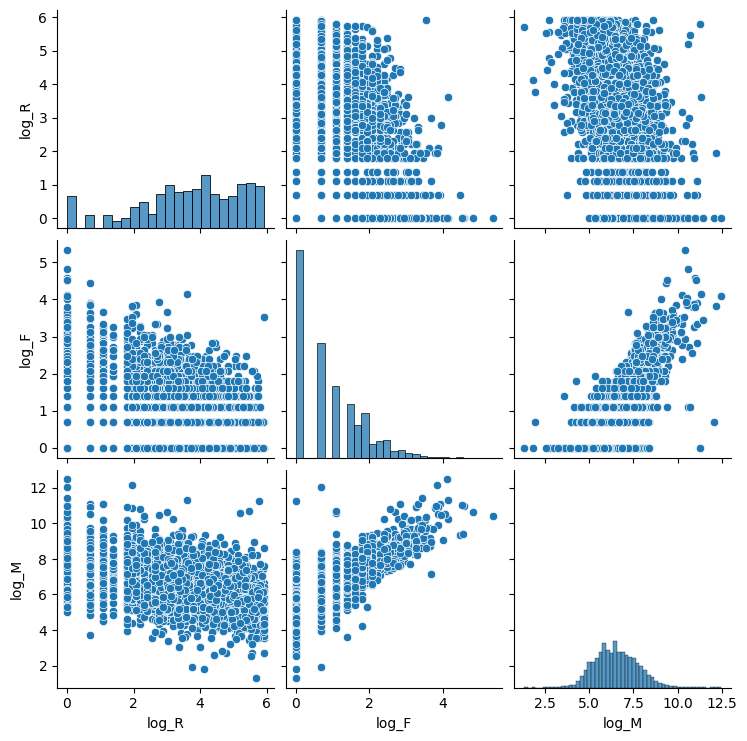

In [71]:
data_norm = df_rfm[["log_R", "log_F", "log_M"]]
plt.figure(figsize=(15,15))
sns.pairplot(data_norm[["log_R", "log_F", "log_M"]]); #after log transformation

In [72]:
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(StandardScaler().fit_transform(data_norm),
                         columns=data_norm.columns,index=data_norm.index) #scaling
df_scaled.head()

,log_R,log_F,log_M
0,1.358011,-1.050247,3.779901
1,-2.368526,1.613303,1.446001
2,-2.368526,4.883947,3.100206
3,-1.921691,0.737495,1.425664
4,-1.921691,0.489630,0.248998


## Clustering Implementation

Try to apply different clustering algoritms to gather clusters like you achieved in manual RFM analysis.

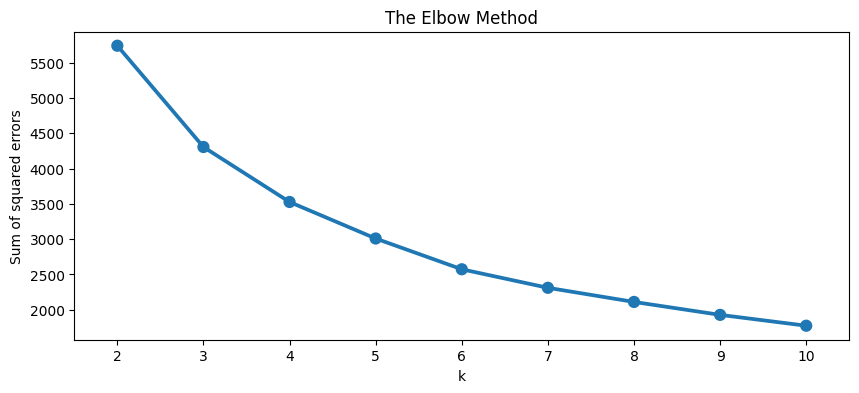

In [73]:
# Features Used in training K Means - Log Transformed Recency, Frequency and Monetary values
data_norm = df_rfm[["log_R", "log_F", "log_M"]]

sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(2, 11):

    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit KMeans on the normalized dataset
    kmeans.fit(df_scaled)

    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Plotting the elbow plot
plt.figure(figsize=(10,4))
plt.title('The Elbow Method')
plt.xlabel('k');
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### i. Define the Optimal Number of Clusters

In [74]:

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(df_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.43578128165893654
For n_clusters = 3, silhouette score is 0.3492982916084669
For n_clusters = 4, silhouette score is 0.34211772300940174
For n_clusters = 5, silhouette score is 0.3090250411152379
For n_clusters = 6, silhouette score is 0.3117995617930838
For n_clusters = 7, silhouette score is 0.3101726624993163
For n_clusters = 8, silhouette score is 0.28137429305441386
For n_clusters = 9, silhouette score is 0.2917056541212576
For n_clusters = 10, silhouette score is 0.2955419648888913


### ii. Model Fitting

In [75]:
# applying Kmeans_clustering algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
labels = kmeans.labels_
df_scaled['Kmeans_Label_ID']=labels

In [76]:
df_scaled

,log_R,log_F,log_M,Kmeans_Label_ID
0,1.358011,-1.050247,3.779901,2
1,-2.368526,1.613303,1.446001,1
2,-2.368526,4.883947,3.100206,1
3,-1.921691,0.737495,1.425664,1
4,-1.921691,0.489630,0.248998,1
...,...,...,...,...
3915,1.254647,-1.050247,-1.075083,0
3916,0.975505,-1.050247,-1.719507,0
3917,-1.213474,-0.280309,-1.086480,2
3918,-1.921691,2.029507,0.870168,1


In [77]:
keys=df_scaled.groupby('Kmeans_Label_ID').log_F.mean().sort_values().index
values=['Bronze','Silver','Gold']
dictionary = dict(zip(keys, values))

df_scaled['Kmeans_Label']=df_scaled.Kmeans_Label_ID.apply(lambda x:dictionary[x] )
df_scaled

,log_R,log_F,log_M,Kmeans_Label_ID,Kmeans_Label
0,1.358011,-1.050247,3.779901,2,Silver
1,-2.368526,1.613303,1.446001,1,Gold
2,-2.368526,4.883947,3.100206,1,Gold
3,-1.921691,0.737495,1.425664,1,Gold
4,-1.921691,0.489630,0.248998,1,Gold
...,...,...,...,...,...
3915,1.254647,-1.050247,-1.075083,0,Bronze
3916,0.975505,-1.050247,-1.719507,0,Bronze
3917,-1.213474,-0.280309,-1.086480,2,Silver
3918,-1.921691,2.029507,0.870168,1,Gold


### iii. Visualize the Clusters

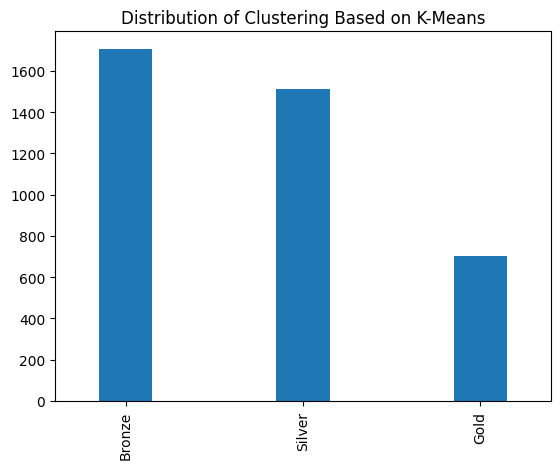

In [78]:
df_scaled.Kmeans_Label.value_counts().plot.bar(width=0.3)
plt.title('Distribution of Clustering Based on K-Means');

In [79]:
# Centers of the clusters(coordinates)
centers = kmeans.cluster_centers_
centers

array([[ 0.6528799 , -0.85743484, -0.81399037],
       [-1.34684822,  1.4884712 ,  1.33382762],
       [-0.10899616,  0.27332648,  0.29626471]])

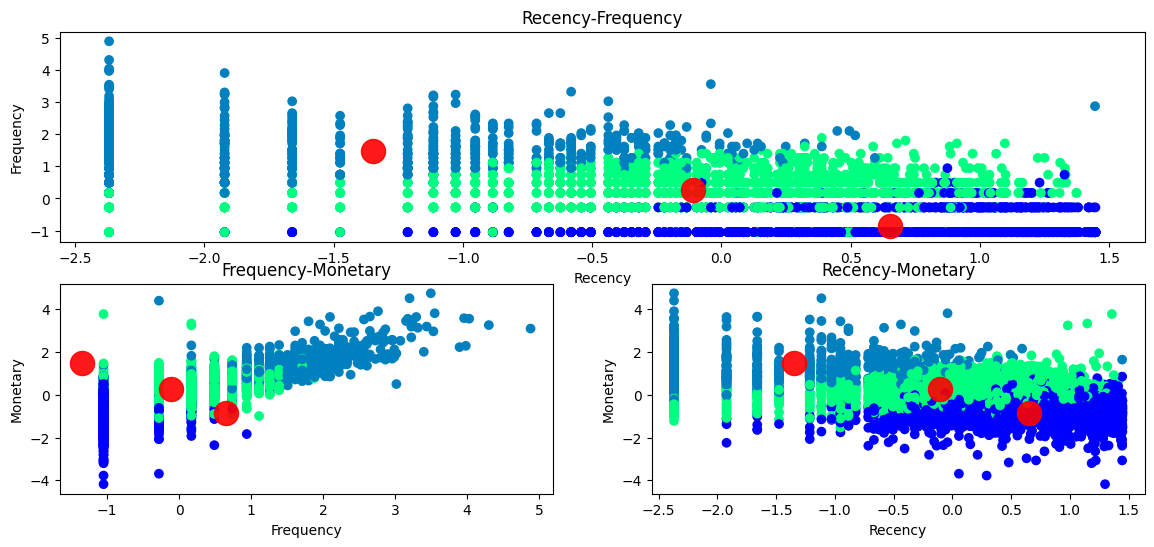

In [80]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))

fig= plt.figure(figsize=(14,6))
ax1=plt.subplot(211)
ax1.set_title('Recency-Frequency')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,1],c=kmeans.labels_,cmap="winter")
ax1.scatter(centers[:, 0], centers[:, 1], s=300,alpha=0.9, label = 'Centroids', c='r')

ax2=plt.subplot(223)
ax2.set_title("Frequency-Monetary")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.scatter(df_scaled.iloc[:,1],df_scaled.iloc[:,2],c=kmeans.labels_,cmap="winter")
ax2.scatter(centers[:, 0], centers[:, 1], s=300,alpha=0.9, label = 'Centroids', c='r');

ax3=plt.subplot(224)
ax3.set_title("Recency-Monetary")
ax3.set_xlabel('Recency')
ax3.set_ylabel('Monetary')
ax3.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,2],c=kmeans.labels_,cmap="winter")
ax3.scatter(centers[:, 0], centers[:, 1], s=300,alpha=0.9, label = 'Centroids', c='r');

<Figure size 1500x1500 with 0 Axes>

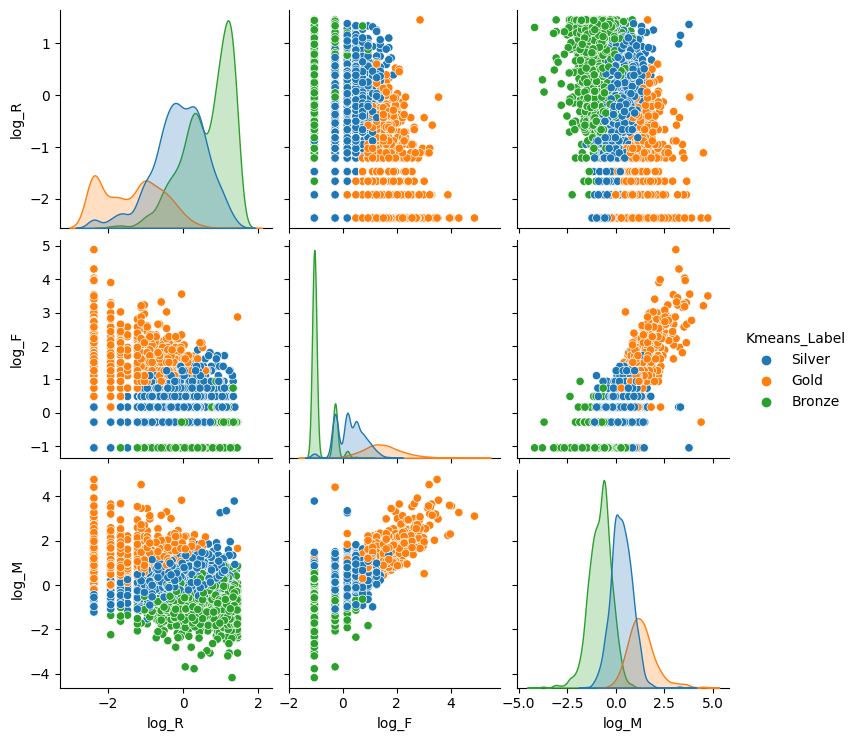

In [81]:
plt.figure(figsize=(15,15))
sns.pairplot(df_scaled[['log_R', 'log_F', 'log_M','Kmeans_Label']],hue='Kmeans_Label');

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results.

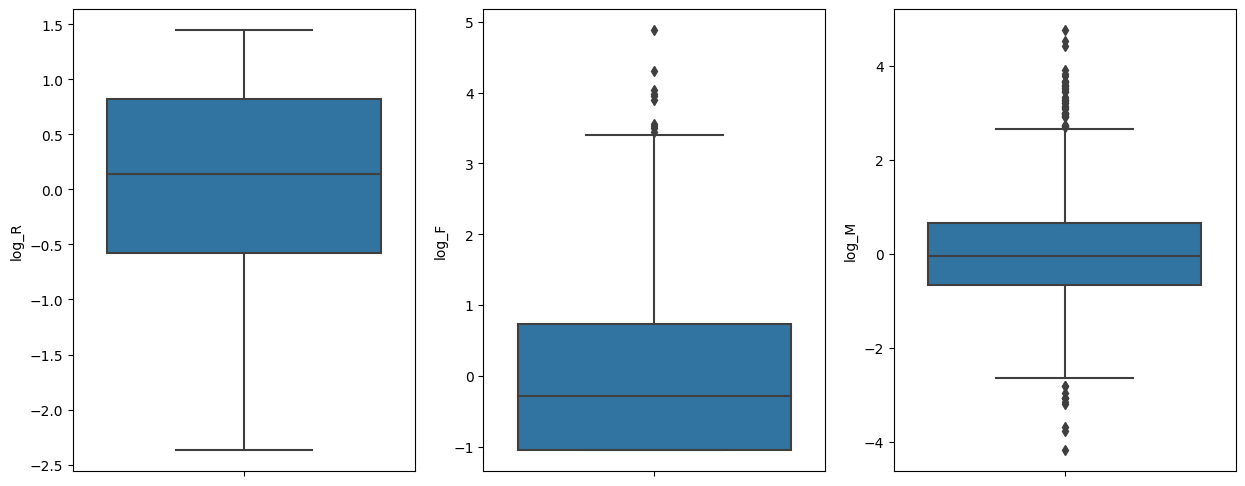

In [82]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(df_scaled['Kmeans_Label'], y=df_scaled['log_R'])

plt.subplot(1,3,2)
sns.boxplot(df_scaled['Kmeans_Label'],y= df_scaled['log_F'])

plt.subplot(1,3,3)
sns.boxplot(df_scaled['Kmeans_Label'], y=df_scaled['log_M'])
plt.show()

### iv. Assign the Label

In [83]:
df_scaled

,log_R,log_F,log_M,Kmeans_Label_ID,Kmeans_Label
0,1.358011,-1.050247,3.779901,2,Silver
1,-2.368526,1.613303,1.446001,1,Gold
2,-2.368526,4.883947,3.100206,1,Gold
3,-1.921691,0.737495,1.425664,1,Gold
4,-1.921691,0.489630,0.248998,1,Gold
...,...,...,...,...,...
3915,1.254647,-1.050247,-1.075083,0,Bronze
3916,0.975505,-1.050247,-1.719507,0,Bronze
3917,-1.213474,-0.280309,-1.086480,2,Silver
3918,-1.921691,2.029507,0.870168,1,Gold


In [84]:
df_scaled["Kmeans_Label"].value_counts(dropna = False)


Bronze    1706
Silver    1512
Gold       702
Name: Kmeans_Label, dtype: int64

### v. Conclusion

Discuss your final results. Compare your own labels from the RFM Customer Segmentation with the labels found by Unsupervised Algorithms.

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Conclusion**

* Write down your conclusions about clustering

In [85]:
RFM_Points_Segments=['1-Best Customers','2-Loyal Customers', '3-Big Spenders' ,'4-Almost Lost' ]
Kmeans_Label=['Silver', 'Gold', 'Bronze']
pd.crosstab(df_scaled['Kmeans_Label'],df_rfm['RFM_Scores_Segments'])[RFM_Points_Segments].loc[Kmeans_Label]

RFM_Scores_Segments,1-Best Customers,2-Loyal Customers,3-Big Spenders,4-Almost Lost
Kmeans_Label,,,,
Silver,242,668,483,119
Gold,6,684,11,1
Bronze,348,12,486,860



**Cluster 0-Silver —> high recency, frequency, and monetary-> best customers->potential to be the target of new products and increase revenue by repeated advertising without heavy discounts**

**Cluster 1-Gold—> high recency and frequency, but low monetary->loyal customers-> potential to be the target on the sale seasons by repeated advertising with heavy discounts.**

**Cluster 2 -Bronze —> low Recency, High Frequency and monetary->almost lost-> need to be addressed urgently with focussed advertising with provide special discounts for them and company should find out why they are leaving**




# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## Future Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [86]:
df_cohort = df
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [87]:

# importing DateTime module to convert extracted dates
import datetime as dt

# Defining the function that will parse the date and return 1st day of respective month
def extract_month(date_value):
  return dt.datetime(date_value.year, date_value.month, 1)

Now we will use the function created above to convert all the invoice dates into respective month date format.

In [88]:
# Creating InvoiceMonth column using the function created in previous step
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].apply(extract_month)
df_cohort[['InvoiceDate','InvoiceMonth']].head()


,InvoiceDate,InvoiceMonth
0,2010-12-01 08:26:00,2010-12-01
1,2010-12-01 08:26:00,2010-12-01
2,2010-12-01 08:26:00,2010-12-01
3,2010-12-01 08:26:00,2010-12-01
4,2010-12-01 08:26:00,2010-12-01


In [89]:
#Creating a groupby object with respect to CustomerID variable, and selecting InvoiceDay for further calculations
group = df_cohort.groupby('CustomerID')['InvoiceMonth']

In [90]:
#assign the acquistion Cohort value to each transaction based on the minimum value of InvoiceMonth of the group it belongs to
df_cohort['CohortMonth'] = group.transform('min')
df_cohort[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01


### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, you will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which you'll create it below.

In [91]:
def parse_dates_int(date_column):
    year = date_column.dt.year
    month = date_column.dt.month

    return year, month

You will use this function to extract the integer values for Invoice as well as
Cohort Date in 3 separate series for each of the two columns

In [92]:

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month = parse_dates_int(df_cohort['InvoiceDate'])

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month = parse_dates_int(df_cohort['CohortMonth'])

# Printing top 5 of each series
cohort_year.head(), cohort_month.head()

(0    2010
 1    2010
 2    2010
 3    2010
 4    2010
 Name: CohortMonth, dtype: int64,
 0    12
 1    12
 2    12
 3    12
 4    12
 Name: CohortMonth, dtype: int64)

Use the variables created above to calcualte the difference in days and store them in cohort Index column.

In [93]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month


# Using the variables created above to calcualte the difference in days and storing them in cohort Index column
df_cohort['CohortIndex'] = years_diff * 12 + months_diff+ 1

In [94]:
df_cohort[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth', 'CohortIndex']].head()


,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth,CohortIndex
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1


## Create 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [95]:
#Count monthly active customers from each cohort
grouping = df_cohort.groupby(['CohortMonth', 'CohortIndex'])

# printing len of group by object
len(grouping)


91

In [96]:

# Counting the number of unique values per customer ID in each group and storing in a Dataframe
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Assigning column names to the dataframe created above
cohort_data.columns = ['CohortMonth',	'CohortIndex',	'Count of unique CustomerID']

# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,Count of unique CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321


In [97]:
# Return number of unique elements in the object.
pivot_cohort1 = cohort_data.reset_index().pivot(index='CohortMonth',columns='CohortIndex',values="Count of unique CustomerID").round(1)
pivot_cohort1

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
sizes = pivot_cohort1.iloc[:, 0]
retention = pivot_cohort1.divide(sizes, axis=0).apply(lambda x: round(x,2))
retention.index = retention.index.strftime('%m-%Y')
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
12-2010,100.0,37.0,32.0,38.0,36.0,40.0,36.0,35.0,35.0,40.0,37.0,50.0,27.0
01-2011,100.0,22.0,27.0,23.0,32.0,29.0,25.0,24.0,30.0,33.0,36.0,12.0,NaN
02-2011,100.0,19.0,19.0,28.0,27.0,25.0,25.0,28.0,25.0,31.0,7.0,NaN,NaN
03-2011,100.0,15.0,25.0,20.0,22.0,17.0,27.0,23.0,28.0,9.0,NaN,NaN,NaN
04-2011,100.0,21.0,20.0,21.0,20.0,23.0,22.0,26.0,7.0,NaN,NaN,NaN,NaN
05-2011,100.0,19.0,17.0,17.0,21.0,23.0,26.0,10.0,NaN,NaN,NaN,NaN,NaN
06-2011,100.0,17.0,16.0,26.0,23.0,33.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
07-2011,100.0,18.0,21.0,22.0,27.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-2011,100.0,21.0,25.0,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

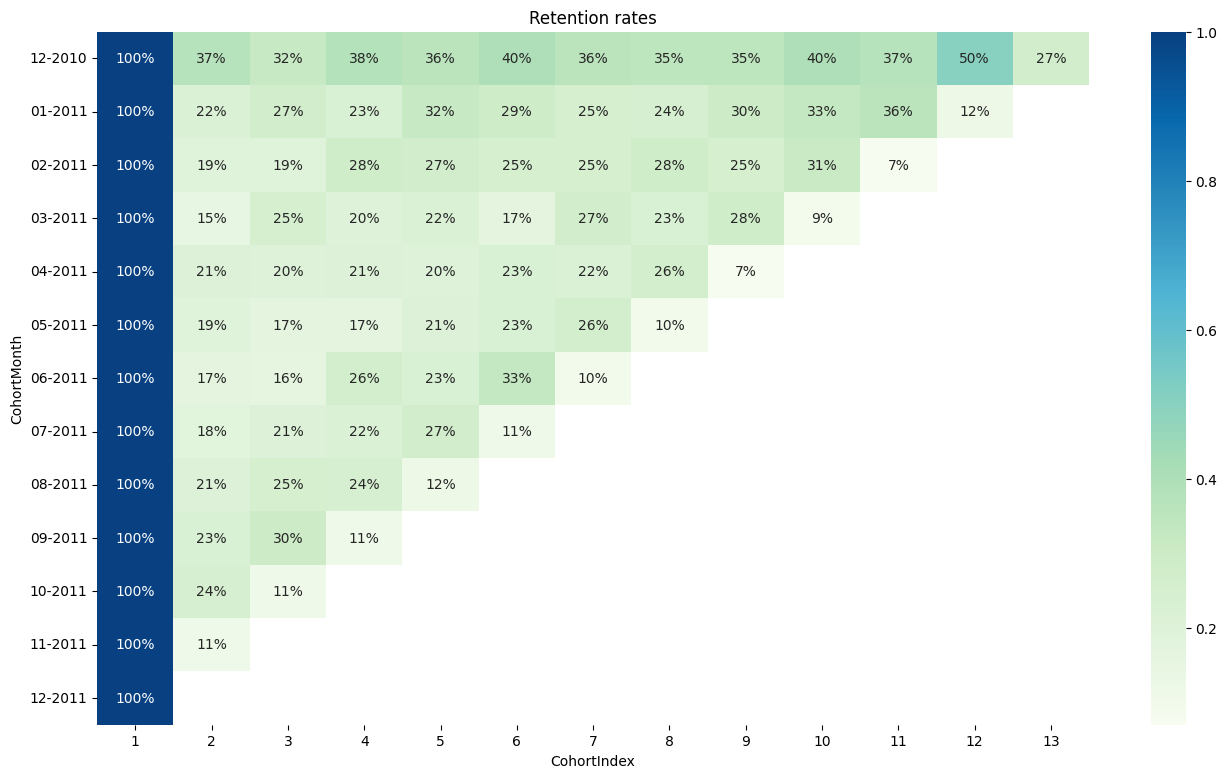

In [99]:
plt.figure(figsize = (16, 9))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', cmap="GnBu")
plt.show()

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

In [100]:
# --Calculate Average Quantity--
grouping_qty = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_qty = grouping_qty['Quantity'].mean()
cohort_data_qty = cohort_data_qty.reset_index()
average_quantity = cohort_data_qty.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='Quantity')
average_quantity.index = average_quantity.index.strftime('%m-%Y')

### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

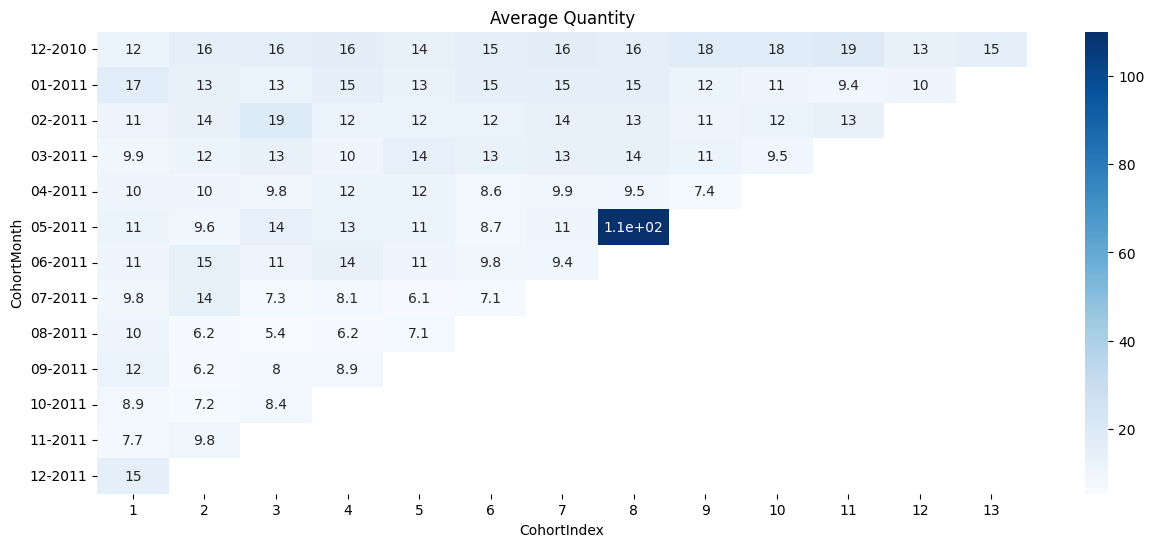

In [101]:
# Plot average quantity
plt.figure(figsize=(15, 6))
plt.title('Average Quantity')
sns.heatmap(data = average_quantity, annot=True, cmap='Blues')
plt.show()

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

In [102]:
# --Calculate Average Price--
grouping_price = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_price = grouping_price['TotalPrice'].mean()
cohort_data_price = cohort_data_price.reset_index()
average_price = cohort_data_price.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='TotalPrice')
average_price.index = average_price.index.strftime('%m-%Y')

### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

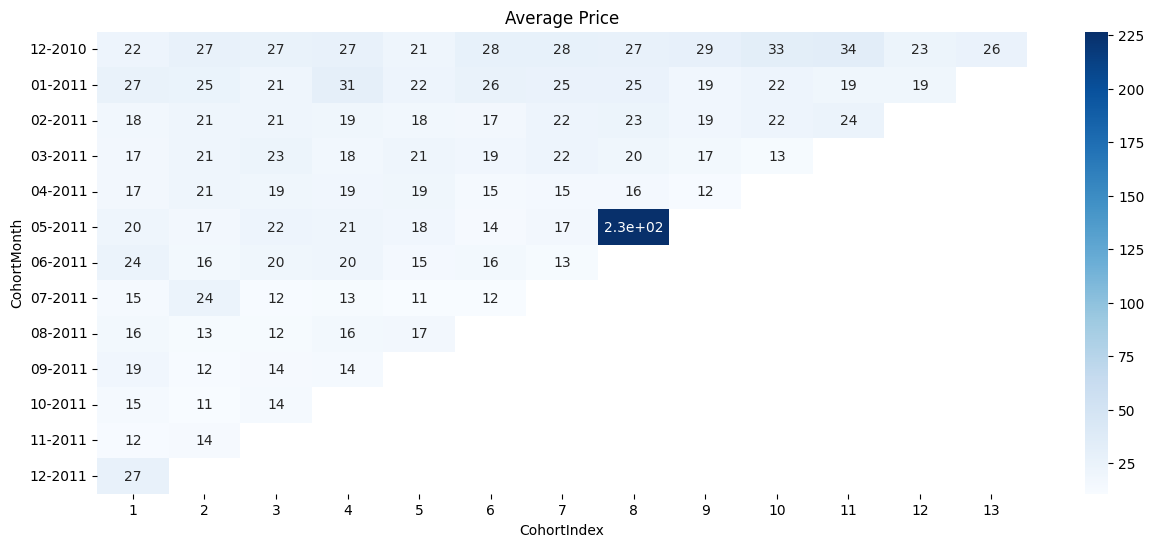

In [103]:
# Plot average sales
plt.figure(figsize=(15, 6))
plt.title('Average Price')
sns.heatmap(data = average_price, annot=True, cmap='Blues')
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___